## CCA : Complete Case Analysis to handle missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_science_job.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
df.isnull().mean()*100 #gives percentage of missing values

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
#we can apply CCA where % of missing value <=5%

In [7]:
df.shape

(19158, 13)

In [9]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
17617,0.624,no_enrollment,Masters,2.0,51.0
15022,0.624,Full time course,Graduate,6.0,42.0
746,0.920,no_enrollment,Graduate,14.0,290.0
15692,0.579,Part time course,Primary School,11.0,14.0
7747,0.920,no_enrollment,Graduate,6.0,74.0


In [12]:
#if I drop all rows with missing values..how much data will be retained
len(df[cols].dropna())/len(df[cols])*100

89.68577095730244

In [13]:
## 89 % data will be retained...11% data lost

In [14]:
new_df=df[cols].dropna()

In [18]:
new_df.shape, df.shape

((17182, 5), (19158, 13))

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

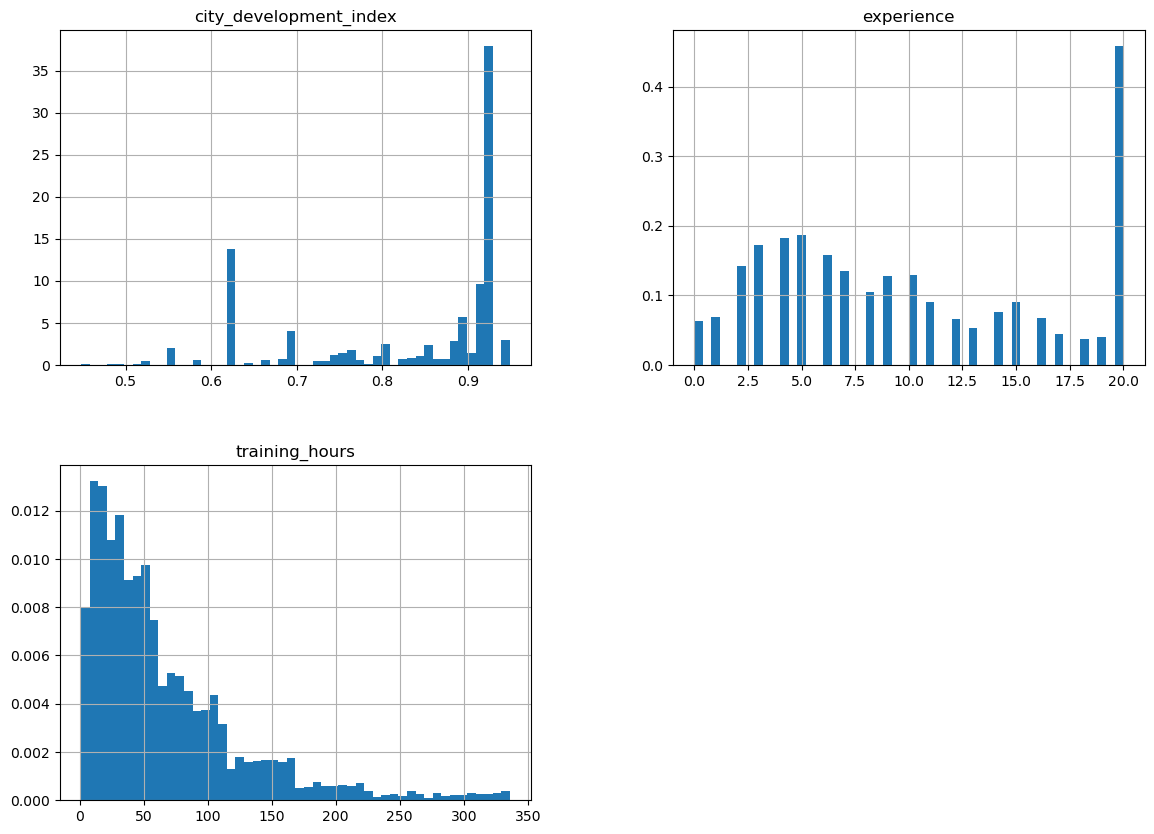

In [22]:
new_df.hist(bins=50,density=True,figsize=(14,10)) 
##dataframe a histogram plot korle sudhu numeric cols gulor hist e plot hoye

In [23]:
## if distribution is same i.e if they overlapp : data is same hence CCA use is safe 

<AxesSubplot:>

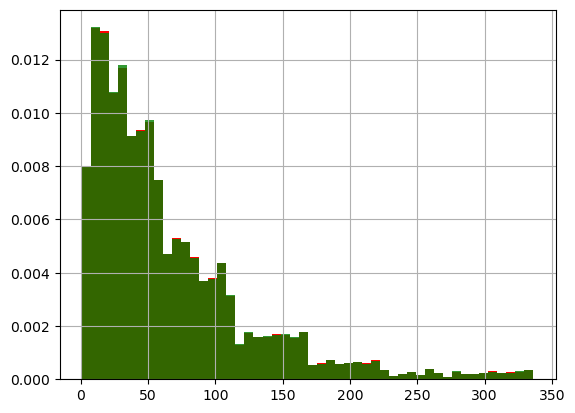

In [25]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

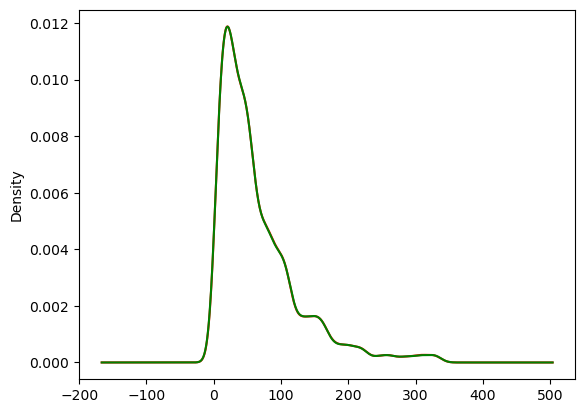

In [26]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')
# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot:>

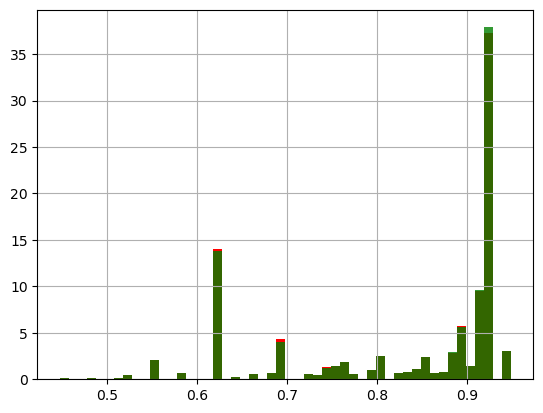

In [27]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

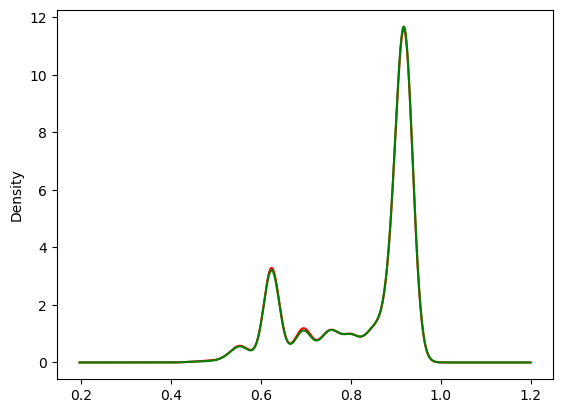

In [28]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')
# data after cca
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot:>

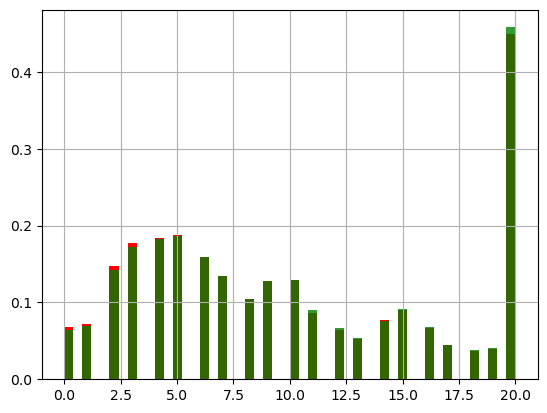

In [29]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

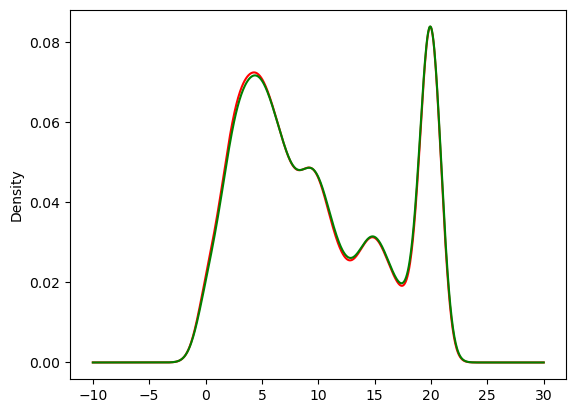

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')
# data after cca
new_df['experience'].plot.density(color='green')

In [36]:
## percentage of observations per category, original data
temp=pd.concat([df['enrolled_university'].value_counts()/len(df),
new_df['enrolled_university'].value_counts()/len(new_df)],axis=1)
temp.columns=['original','cca']
temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [37]:
## percentage of observations per category, original data
temp=pd.concat([df['education_level'].value_counts()/len(df),
new_df['education_level'].value_counts()/len(new_df)],axis=1)
temp.columns=['original','cca']
temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
